In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
df = pd.read_csv("NYC_nightclubs.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df["tip_rate"] = df["tip_amount"] / df["fare_amount"]

In [4]:
def pickup_neighbor(df, coor):
    lat, long = coor
    return df[(df["pickup_latitude"] > lat - 0.001) & (df["pickup_latitude"] < lat + 0.001) & \
   (df["pickup_longitude"] > long - 0.001) & (df["pickup_longitude"] < long + 0.001)].index

In [5]:
def dropoff_neighbor(df, coor):
    lat, long = coor
    return df[(df["dropoff_latitude"] > lat - 0.001) & (df["dropoff_latitude"] < lat + 0.001) & \
   (df["dropoff_longitude"] > long - 0.001) & (df["dropoff_longitude"] < long + 0.001)].index

In [6]:
clubs = [(40.74405065, -74.00631335), (40.7111048, -73.9651604), (40.7104806, -73.9540968),
         (40.6883159, -73.9568761), (40.7397342, -74.0070218), (40.6721649, -73.9576687),
         (40.7423311, -74.0034791), (40.766805, -73.996215), (40.678534, -73.958435),
         (40.7268963, -73.9529488), (40.8222947, -73.9501033), (40.706758, -73.92355685),
         (40.7640706, -73.9975569), (40.7409232, -74.008111), (40.6785007, -73.9833014),
         (40.7500697, -74.0027905), (40.8046775, -73.9522994), (40.722524, -73.9797307),
         (40.7223166, -73.9578179), (40.7382579, -74.0094507), (40.7645758, -73.99595),
         (40.7071318, -73.9474399), (40.7220265, -73.9591725)]

In [7]:
mapping = {
    1: "1 Oak / Avenue",
    2: "Bembe",
    3: "Black Flamingo",
    4: "C'mon Everybody",
    5: "Cielo",
    6: "Drink Lounge",
    7: "Electric Room / PH-D at Dream Downtown",
    8: "FREQ",
    9: "Friends and Lovers",
    10: "Good Room",
    11: "Grill On The Hill",
    12: "House of Yes / The Cobra Club",
    13: "Hudson Terrace",
    14: "Le Bain",
    15: "Littlefield",
    16: "Marquee New York",
    17: "Minton's Playhouse",
    18: "Nublu",
    19: "Output",
    20: "The Jane Hotel",
    21: "The Press Lounge",
    22: "The Rosemont",
    23: "Verboten"
}

In [8]:
df["start"] = 0
df["end"] = 0

In [9]:
c = 0
for club in clubs:
    c += 1
    
    if c in (1, 5, 7, 8, 13, 14, 16, 18, 19, 20, 21):
        df.loc[pickup_neighbor(df, club), "start"] = c
        df.loc[dropoff_neighbor(df, club), "end"] = c

In [10]:
unweighted = df[(df["start"] != 0) & (df["end"] != 0) & (df["start"] != df["end"])]

In [11]:
weighted = unweighted.groupby(["start", "end"]).size()

In [12]:
weighted = weighted.reset_index()

In [13]:
weighted = weighted.rename(columns={0:"weight"})

In [ ]:
'''
from graphviz import Digraph
import pandas as pd

G = Digraph(format='jpeg')

G.attr(rankdir='LR', size='8,5')
G.attr('node', shape='circle')

df = weighted

nodelist = []
for idx, row in df.iterrows():
    node1, node2, weight = [str(i) for i in row]

    if node1 not in nodelist:
        G.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        G.node(node2)
        nodelist.append(node2)

    G.edge(node1,node2, label = weight)

G.render('sg', view=True)
'''

In [14]:
G = nx.from_pandas_dataframe(unweighted, "start", "end")

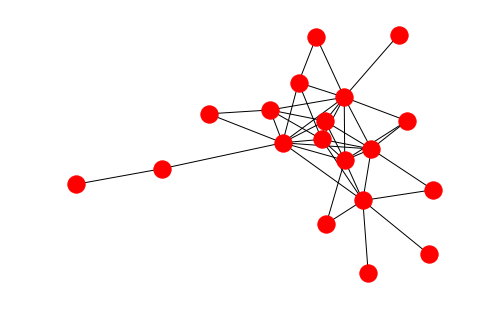

In [15]:
nx.draw(G) # all 23 clubs

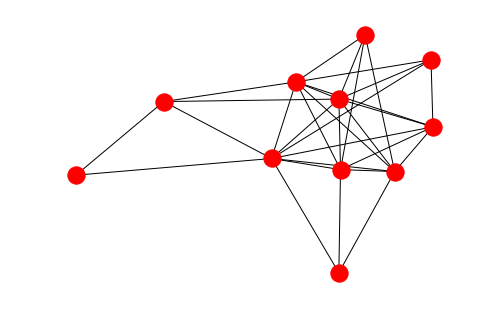

In [15]:
nx.draw(G) # top 11 clubs